In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
np.random.seed(2137)

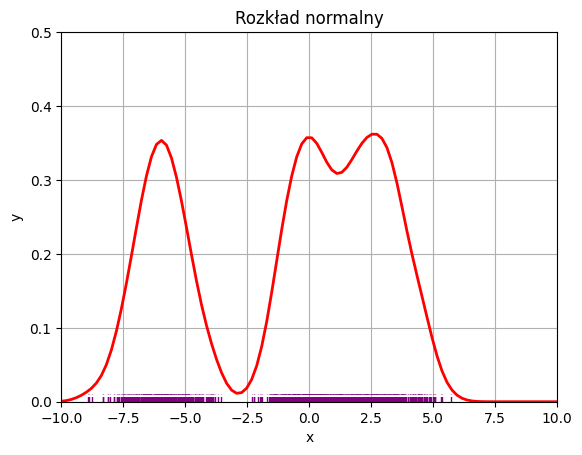

In [73]:
h = 0.5
m = 1000


Xis = [np.random.normal(-6,1, int(0.3*m)),
       np.random.normal(0,1,int(0.4*m)),
       np.random.normal(3,1,int(0.3*m))]

Xi = np.concatenate(Xis)
x = np.linspace(-10.0, 10.0, num=100)
y = np.sum(np.stack([1/(m_i*h*np.sqrt(2*np.pi))*sum(map(lambda x_i: np.exp(-((x-x_i)/h)**2/2), xi)) for m_i, xi in zip((int(0.3*m),int(0.4*m),int(0.3*m)),Xis)]), axis=0)

plt.plot(x, y, linewidth=2, color='r')
plt.vlines(x=Xi, ymin=-0.01, ymax=0.01, colors='purple', ls='--', lw=1, label='vline_multiple - full height')
plt.title("Rozkład normalny")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([0, 0.5])
plt.grid()

plt.show()

In [74]:
def calculate_h(m, x):
    V = 1/(m-1) * np.sum(np.power(x,2)) - 1/(m*(m-1))*(np.sum(x)**2)

    sigma = np.sqrt(V)
    c8 = 105/(32 * np.sqrt(np.pi) * sigma**9 )

    K_6 = -15/np.sqrt(2*np.pi)
    U_K = 1

    hII = ((-2*K_6)/(U_K*c8*m))**(1/9)

    def K_6_x(x):
        return 1/(np.sqrt(2*np.pi)) * (x**6 - 15*x**4 + 45*x**2-15) * np.exp(-1/2*x**2) 
    xi = 6
    C_6_hII = 1/(m**2 * hII**(xi+1)) * np.sum([np.sum([K_6_x((x_i-x_j)/hII) for x_j in x]) for x_i in x ])

    K_4 = 3/(np.sqrt(2*np.pi))
    hI = ((-2*K_4)/(U_K*C_6_hII*m))**(1/7)

    def K_4_x(x):
        return 1/(np.sqrt(2*np.pi)) * (x**4 - 6*x**2 + 3) * np.exp(-1/2*x**2) 
    xi = 4
    C_4_hI = 1/(m**2 * hI**(xi+1)) * np.sum([np.sum([K_4_x((x_i-x_j)/hI) for x_j in x]) for x_i in x ])

    Z_f = C_4_hI

    U_K = 1
    W_K = 1/(2*np.sqrt(np.pi))
    h=( (W_K)/(U_K**2 * Z_f * m) )**(1/5)

    print(f'V = {V}\n'
        f'sigma = {sigma}\n'
        f'c8 = {c8}\n'
        f'K_6 = {K_6}\n'
        f'U_K = {U_K}\n'
        f'hII = {hII}\n'
        f'C_6_hII = {C_6_hII}\n'
        f'K_4 = {K_4}\n'
        f'hI = {hI}\n'
        f'C_4_hI = {C_4_hI}\n'
        f'Z_f = {Z_f}\n'
        f'W_K = {W_K}\n'
        f'h = {h}')
    
    return h

In [75]:
calculate_h(m, Xi)

V = 13.549928717923112
sigma = 3.6810227815001517
c8 = 1.4919279049192413e-05
K_6 = -5.984134206021491
U_K = 1
hII = 2.1023168192920183
C_6_hII = -0.001974068456306738
K_4 = 1.1968268412042982
hI = 1.0279145543412105
C_4_hI = 0.01620251241737494
Z_f = 0.01620251241737494
W_K = 0.28209479177387814
h = 0.4447977083107579


0.4447977083107579